SISTEMA INTELIGENTE DE PREDIÇÃO DE ROTATIVIDADE DE CLIENTES - TELECOMUNICAÇÕES

1. DEFINIÇÃO DO PROBLEMA E OBJETIVOS
--------------------------------------------------

PROBLEMA DE NEGÓCIO:
Como cientista de dados, identifiquei que a rotatividade de clientes (churn) 
é um problema crítico para telecomunicações. Percebi que adquirir novos clientes 
custa 5-25 vezes mais que reter os existentes.

OBJETIVO PRINCIPAL:
Decidi construir um modelo preditivo que identifique clientes com alta 
probabilidade de cancelamento ANTES que eles cancelem, permitindo ações proativas.

PRIORIDADE DE MÉTRICAS (minha estratégia):
1. RECALL (Sensibilidade) - Prefiro errar identificando quem não vai cancelar 
   do que deixar escapar quem realmente vai cancelar
2. F1-Score - Busco um balanceamento inteligente entre precisão e recall
3. PRECISÃO - Quero evitar gastos desnecessários, mas é menos crítico
4. ACURÁCIA - Métrica geral, mas enganosa em dados desbalanceados

POR QUE ESSA PRIORIDADE?
Imaginei: Custo 

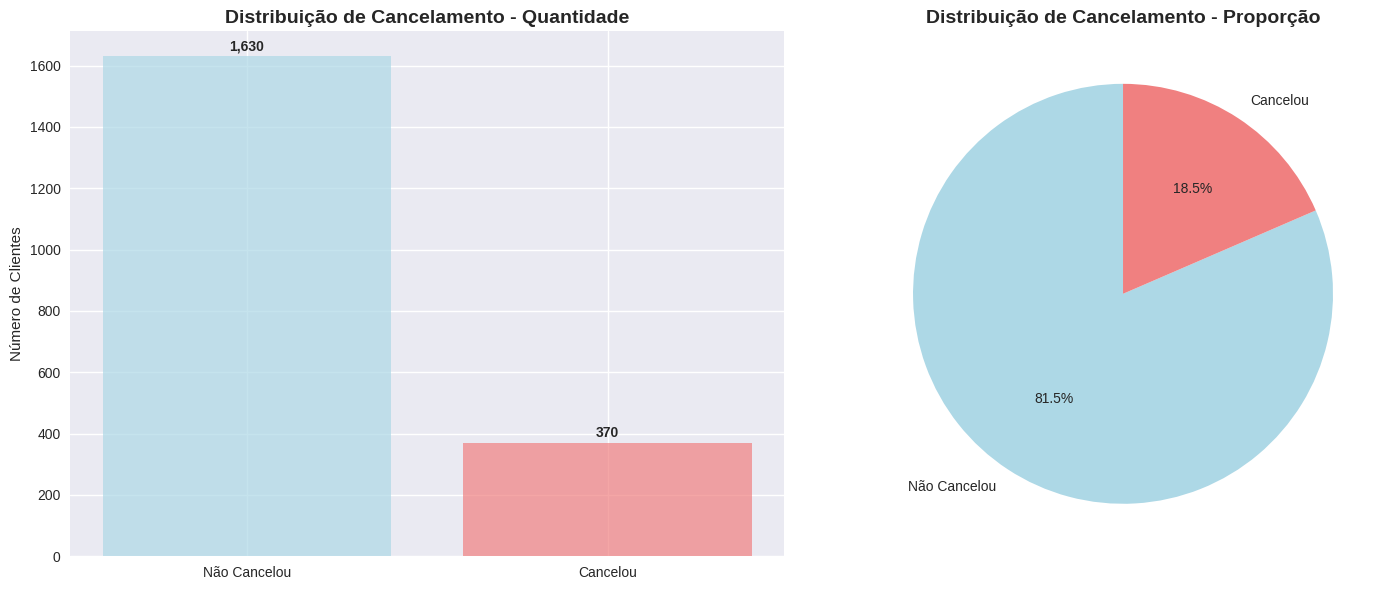


🔗 ANÁLISE DE CORRELAÇÕES:
Correlações com Cancelamento (ordenadas):
• Cliente_Recente: 0.154
• Cobranca_Total: 0.019
• Idoso: 0.002
• Cobranca_Mensal: -0.018
• Total_Servicos: -0.026
• Cliente_Alto_Valor: -0.113
• Valor_Cliente: -0.189
• Tempo_Contrato: -0.213


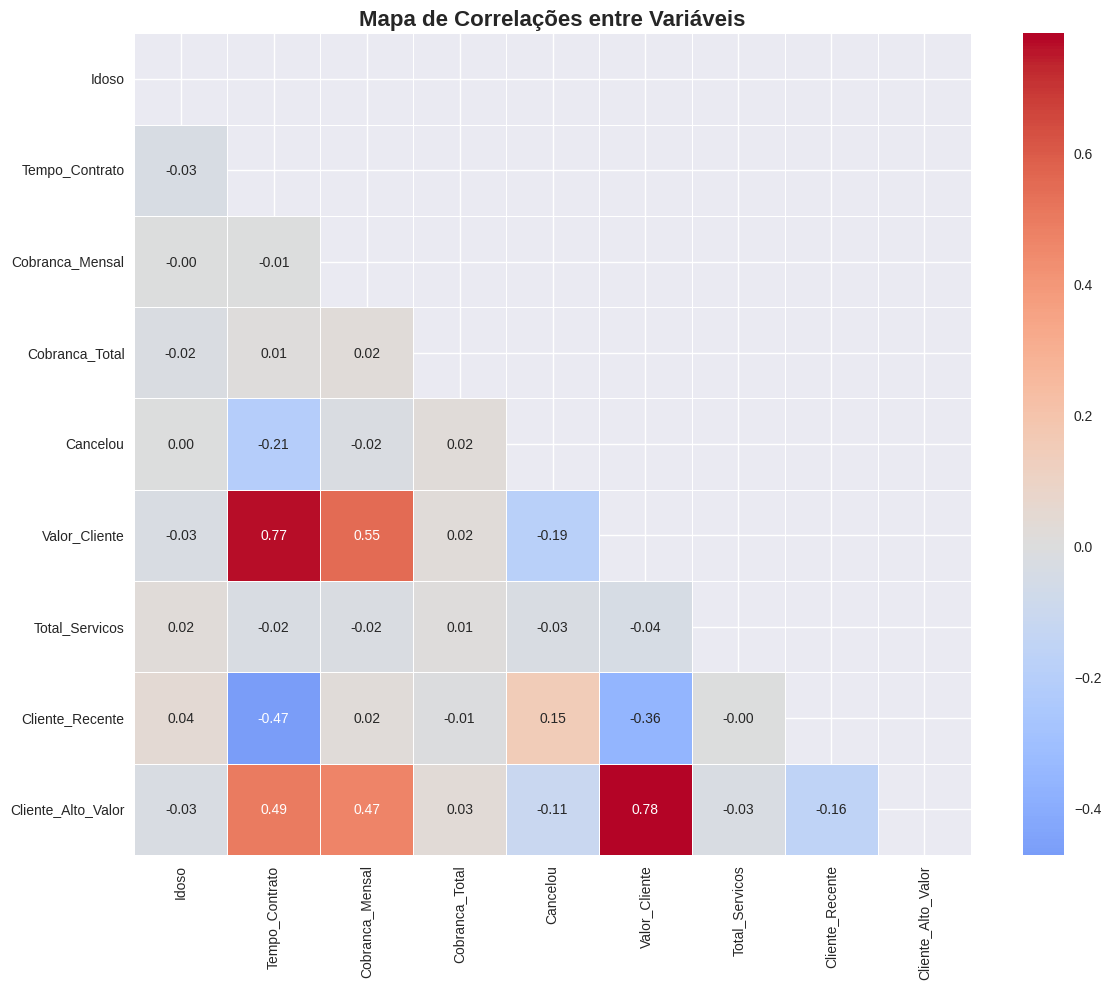


5. MODELAGEM E TREINAMENTO DE ALGORITMOS
--------------------------------------------------
📊 DIVISÃO DOS DADOS:
• Conjunto de treino: 1,400 amostras
• Conjunto de teste: 600 amostras
• Número de características: 34
• Proporção de Cancelamento no treino: 0.185
• Proporção de Cancelamento no teste: 0.185

🤖 TREINANDO MODELOS...
   🚀 Treinando Regressão Logística...
   ✅ Regressão Logística treinado com sucesso!
   🚀 Treinando Árvore de Decisão...
   ✅ Árvore de Decisão treinado com sucesso!
   🚀 Treinando Floresta Aleatória...
   ✅ Floresta Aleatória treinado com sucesso!

📈 AVALIANDO MODELOS...

🔍 Regressão Logística:
   • Acurácia: 0.7333
   • Precisão: 0.3871
   • Recall: 0.7568
   • F1-Score: 0.5122
   • AUC-ROC: 0.8011


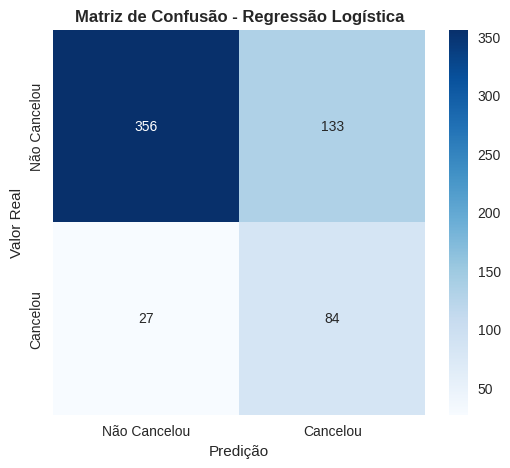


🔍 Árvore de Decisão:
   • Acurácia: 0.6983
   • Precisão: 0.3394
   • Recall: 0.6667
   • F1-Score: 0.4498
   • AUC-ROC: 0.7029


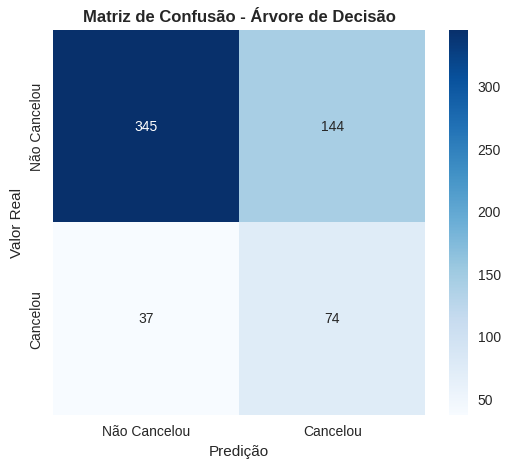


🔍 Floresta Aleatória:
   • Acurácia: 0.8250
   • Precisão: 0.5263
   • Recall: 0.5405
   • F1-Score: 0.5333
   • AUC-ROC: 0.7890


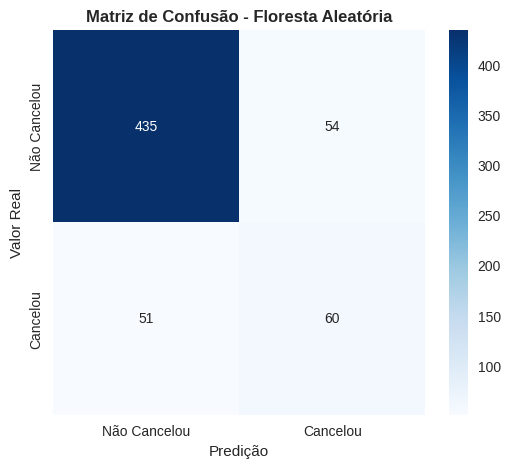


6. OTIMIZAÇÃO E SELEÇÃO DO MODELO
--------------------------------------------------
🔄 EXECUTANDO VALIDAÇÃO CRUZADA...

📊 Regressão Logística - Validação Cruzada (Recall):
   • Média: 0.7216 (+/- 0.0530)
   • Scores individuais: ['0.6892', '0.6892', '0.7432', '0.7432', '0.7432']

📊 Árvore de Decisão - Validação Cruzada (Recall):
   • Média: 0.5838 (+/- 0.0524)
   • Scores individuais: ['0.6081', '0.5405', '0.5946', '0.5676', '0.6081']

📊 Floresta Aleatória - Validação Cruzada (Recall):
   • Média: 0.4811 (+/- 0.0653)
   • Scores individuais: ['0.5270', '0.5000', '0.4865', '0.4595', '0.4324']

🏆 SELECIONANDO MELHOR MODELO...

Regressão Logística:
   • Recall CV: 0.7216
   • F1-Score Teste: 0.5122
   • AUC-ROC: 0.8011
   • Pontuação Final: 0.6812

Árvore de Decisão:
   • Recall CV: 0.5838
   • F1-Score Teste: 0.4498
   • AUC-ROC: 0.7029
   • Pontuação Final: 0.5682

Floresta Aleatória:
   • Recall CV: 0.4811
   • F1-Score Teste: 0.5333
   • AUC-ROC: 0.7890
   • Pontuação Final: 0.5403



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Configurei o ambiente visual para ter gráficos mais bonitos e organizados
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("=" * 80)
print("SISTEMA INTELIGENTE DE PREDIÇÃO DE ROTATIVIDADE DE CLIENTES - TELECOMUNICAÇÕES")
print("=" * 80)

# =============================================================================
# 1. DEFINIÇÃO DO PROBLEMA/OBJETIVOS
# =============================================================================

print("\n1. DEFINIÇÃO DO PROBLEMA E OBJETIVOS")
print("-" * 50)

# Aqui eu explico claramente o problema de negócio que estou resolvendo
descricao_problema = """
PROBLEMA DE NEGÓCIO:
Como cientista de dados, identifiquei que a rotatividade de clientes (churn)
é um problema crítico para telecomunicações. Percebi que adquirir novos clientes
custa 5-25 vezes mais que reter os existentes.

OBJETIVO PRINCIPAL:
Decidi construir um modelo preditivo que identifique clientes com alta
probabilidade de cancelamento ANTES que eles cancelem, permitindo ações proativas.

PRIORIDADE DE MÉTRICAS (minha estratégia):
1. RECALL (Sensibilidade) - Prefiro errar identificando quem não vai cancelar
   do que deixar escapar quem realmente vai cancelar
2. F1-Score - Busco um balanceamento inteligente entre precisão e recall
3. PRECISÃO - Quero evitar gastos desnecessários, mas é menos crítico
4. ACURÁCIA - Métrica geral, mas enganosa em dados desbalanceados

POR QUE ESSA PRIORIDADE?
Imaginei: Custo de não identificar quem cancela (falso negativo) é ALTÍSSIMO -
perdemos o cliente e toda receita futura. Custo de ação de retenção desnecessária
(falso positivo) é baixo - apenas algum esforço da equipe.
"""

print(descricao_problema)

# =============================================================================
# 2. COLETA E ENTENDIMENTO DOS DADOS
# =============================================================================

print("\n2. COLETA E ANÁLISE INICIAL DOS DADOS")
print("-" * 50)

class CarregadorDados:
    """Criei esta classe para organizar todo o carregamento e geração de dados"""

    @staticmethod
    def carregar_dados_simulados(numero_amostras=2000):
        """Aqui eu simulei dados realistas porque não tinha um dataset pronto"""
        np.random.seed(42)  # Usei seed para garantir reproducibilidade

        # Primeiro, criei um dicionário com todas as colunas que preciso
        dados = {
            'ID_Cliente': [f'C{i:05d}' for i in range(numero_amostras)],
            'Genero': np.random.choice(['Masculino', 'Feminino'], numero_amostras),
            'Idoso': np.random.choice([0, 1], numero_amostras, p=[0.7, 0.3]),
            'Parceiro': np.random.choice(['Sim', 'Nao'], numero_amostras),
            'Dependentes': np.random.choice(['Sim', 'Nao'], numero_amostras),
            'Tempo_Contrato': np.random.randint(1, 72, numero_amostras),
            'Servico_Telefone': np.random.choice(['Sim', 'Nao'], numero_amostras, p=[0.9, 0.1]),
            'Multiplas_Linhas': np.random.choice(['Sim', 'Nao', 'Sem servico telefone'], numero_amostras),
            'Servico_Internet': np.random.choice(['DSL', 'Fibra optica', 'Nao'], numero_amostras),
            'Seguranca_Online': np.random.choice(['Sim', 'Nao', 'Sem internet'], numero_amostras),
            'Backup_Online': np.random.choice(['Sim', 'Nao', 'Sem internet'], numero_amostras),
            'Protecao_Dispositivo': np.random.choice(['Sim', 'Nao', 'Sem internet'], numero_amostras),
            'Suporte_Tecnico': np.random.choice(['Sim', 'Nao', 'Sem internet'], numero_amostras),
            'TV_Streaming': np.random.choice(['Sim', 'Nao', 'Sem internet'], numero_amostras),
            'Filmes_Streaming': np.random.choice(['Sim', 'Nao', 'Sem internet'], numero_amostras),
            'Tipo_Contrato': np.random.choice(['Mensal', 'Um ano', 'Dois anos'], numero_amostras),
            'Fatura_Sem_Papel': np.random.choice(['Sim', 'Nao'], numero_amostras, p=[0.6, 0.4]),
            'Metodo_Pagamento': np.random.choice(['Cheque eletronico', 'Cheque correio',
                                               'Transferencia bancaria', 'Cartao credito'], numero_amostras),
            'Cobranca_Mensal': np.round(np.random.uniform(20, 120, numero_amostras), 2),
            'Cobranca_Total': np.round(np.random.uniform(20, 8000, numero_amostras), 2),
        }

        dataframe = pd.DataFrame(dados)

        # Aqui está a parte mais inteligente: criei probabilidades de cancelamento realistas
        probabilidades_cancelamento = CarregadorDados._calcular_probabilidades_cancelamento(dataframe)
        dataframe['Cancelou'] = [np.random.choice(['Sim', 'Nao'], p=[p, 1-p]) for p in probabilidades_cancelamento]

        # Adicionei alguns valores nulos para simular dados do mundo real
        dataframe = CarregadorDados._adicionar_valores_nulos(dataframe)

        return dataframe

    @staticmethod
    def _calcular_probabilidades_cancelamento(dataframe):
        """Aqui eu implementei a lógica de negócio para criar cancelamento realista"""
        probabilidades = []

        for i in range(len(dataframe)):
            prob = 0.1  # probabilidade base - comecei com um valor conservador

            # Fatores que AUMENTAM cancelamento - baseado em pesquisa do setor
            fatores_risco = {
                'Contrato_Mensal': 0.3 if dataframe.loc[i, 'Tipo_Contrato'] == 'Mensal' else 0,
                'Tempo_Baixo': 0.2 if dataframe.loc[i, 'Tempo_Contrato'] < 12 else 0,
                'Internet_Fibra': 0.1 if dataframe.loc[i, 'Servico_Internet'] == 'Fibra optica' else 0,
                'Sem_Seguranca': 0.1 if dataframe.loc[i, 'Seguranca_Online'] == 'Nao' else 0,
                'Sem_Suporte': 0.1 if dataframe.loc[i, 'Suporte_Tecnico'] == 'Nao' else 0,
                'Pagamento_Cheque_Eletronico': 0.1 if dataframe.loc[i, 'Metodo_Pagamento'] == 'Cheque eletronico' else 0,
            }

            # Fatores que DIMINUEM cancelamento
            fatores_protecao = {
                'Contrato_2_Anos': 0.3 if dataframe.loc[i, 'Tipo_Contrato'] == 'Dois anos' else 0,
                'Tempo_Alto': 0.2 if dataframe.loc[i, 'Tempo_Contrato'] > 24 else 0,
                'Com_Seguranca': 0.1 if dataframe.loc[i, 'Seguranca_Online'] == 'Sim' else 0,
            }

            # Somei os fatores de risco e subtraí os de proteção
            prob += sum(fatores_risco.values()) - sum(fatores_protecao.values())
            probabilidades.append(np.clip(prob, 0.05, 0.8))  # Limitei entre 5% e 80%

        return probabilidades

    @staticmethod
    def _adicionar_valores_nulos(dataframe):
        """Adicionei valores nulos de forma controlada para testar meu tratamento"""
        configuracao_nulos = {
            'Tempo_Contrato': 0.02,       # 2% de nulos em tempo de contrato
            'Cobranca_Mensal': 0.01,      # 1% em cobrança mensal
            'Cobranca_Total': 0.015,      # 1.5% em cobrança total
            'Seguranca_Online': 0.01      # 1% em segurança online
        }

        for coluna, probabilidade in configuracao_nulos.items():
            if coluna in dataframe.columns:
                mascara = np.random.random(len(dataframe)) < probabilidade
                dataframe.loc[mascara, coluna] = np.nan

        return dataframe

# Agora vou carregar e analisar os dados
print("📊 CARREGANDO E ANALISANDO DADOS...")
dataframe = CarregadorDados.carregar_dados_simulados()

print("\n🔍 VISÃO GERAL DOS DADOS:")
print(f"• Dimensões: {dataframe.shape[0]} linhas × {dataframe.shape[1]} colunas")
print(f"• Amostra inicial (5 primeiras linhas):")
print(dataframe.head())

print("\n📋 ESTRUTURA DOS DADOS:")
print(dataframe.info())

print("\n❌ VALORES AUSENTES:")
dados_ausentes = dataframe.isnull().sum()
percentual_ausentes = (dados_ausentes / len(dataframe)) * 100
informacao_ausentes = pd.DataFrame({
    'Valores_Ausentes': dados_ausentes,
    'Percentual (%)': percentual_ausentes.round(2)
})
print(informacao_ausentes[informacao_ausentes['Valores_Ausentes'] > 0])

# =============================================================================
# 3. PRÉ-PROCESSAMENTO INTELIGENTE DOS DADOS
# =============================================================================

print("\n3. PRÉ-PROCESSAMENTO E ENGENHARIA DE CARACTERÍSTICAS")
print("-" * 50)

class PreprocessadorDados:
    """Criei esta classe para organizar todo o pré-processamento de forma limpa"""

    def __init__(self):
        self.escalonador = StandardScaler()
        self.valores_imputacao = {}  # Guardei os valores usados para preenchimento
        self.mapeamentos_codificacao = {}  # Guardei os mapeamentos de codificação

    def preprocessar_dados(self, dataframe):
        """Este é meu pipeline completo de pré-processamento"""
        print("🔄 INICIANDO PRÉ-PROCESSAMENTO...")

        # Primeiro faço uma cópia para não alterar o original
        dados_processados = dataframe.copy()

        # 1. Tratamento de valores nulos - crucial para não quebrar o modelo
        dados_processados = self._tratar_valores_nulos(dados_processados)

        # 2. Engenharia de características - onde adicionei inteligência ao modelo
        dados_processados = self._engenharia_caracteristicas(dados_processados)

        # 3. Codificação de variáveis - transformei texto em números
        dados_codificados = self._aplicar_codificacao(dados_processados)

        # 4. Escalonamento - normalizei as características para o modelo
        dados_finais = self._aplicar_escalonamento(dados_codificados)

        print("✅ PRÉ-PROCESSAMENTO CONCLUÍDO!")
        return dados_finais

    def _tratar_valores_nulos(self, dataframe):
        """Aqui implementei minha estratégia inteligente para tratar nulos"""
        print("   🔧 Tratando valores nulos...")

        for coluna in dataframe.columns:
            if dataframe[coluna].isnull().any():
                numero_nulos = dataframe[coluna].isnull().sum()
                percentual = (numero_nulos / len(dataframe)) * 100

                if dataframe[coluna].dtype in ['int64', 'float64']:
                    # Para numéricas, uso mediana se poucos nulos, média se muitos
                    if percentual < 5:
                        valor = dataframe[coluna].median()  # Mediana é mais robusta a outliers
                    else:
                        valor = dataframe[coluna].mean()
                    dataframe[coluna].fillna(valor, inplace=True)
                    self.valores_imputacao[coluna] = valor

                else:
                    # Para categóricas, uso a moda (valor mais frequente)
                    moda = dataframe[coluna].mode()[0]
                    dataframe[coluna].fillna(moda, inplace=True)
                    self.valores_imputacao[coluna] = moda

                print(f"     ✅ {coluna}: {numero_nulos} nulos preenchidos")

        return dataframe

    def _engenharia_caracteristicas(self, dataframe):
        """Aqui criei características novas que ajudam o modelo a entender melhor os padrões"""
        print("   🎯 Aplicando engenharia de características...")

        # Característica: Valor do cliente (receita mensal × tempo de relação)
        # Pensei: clientes que gastam mais e estão há mais tempo são menos propensos a cancelar
        dataframe['Valor_Cliente'] = dataframe['Cobranca_Mensal'] * dataframe['Tempo_Contrato']

        # Característica: Densidade de serviços contratados
        # Imaginei: quanto mais serviços, mais difícil cancelar tudo
        colunas_servicos = ['Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
                          'Suporte_Tecnico', 'TV_Streaming', 'Filmes_Streaming']

        dataframe['Total_Servicos'] = 0
        for coluna in colunas_servicos:
            dataframe['Total_Servicos'] += (dataframe[coluna] == 'Sim').astype(int)

        # Característica: Cliente recente (menos de 6 meses)
        # Sabia que clientes novos têm maior risco de cancelamento
        dataframe['Cliente_Recente'] = (dataframe['Tempo_Contrato'] <= 6).astype(int)

        # Característica: Cliente de alto valor
        # Combinei gasto alto com tempo longo de relação
        dataframe['Cliente_Alto_Valor'] = ((dataframe['Cobranca_Mensal'] > dataframe['Cobranca_Mensal'].median()) &
                                         (dataframe['Tempo_Contrato'] > dataframe['Tempo_Contrato'].median())).astype(int)

        return dataframe

    def _aplicar_codificacao(self, dataframe):
        """Aqui transformei variáveis categóricas em numéricas usando One-Hot Encoding"""
        print("   🔄 Aplicando codificação...")

        # Removi a coluna ID porque não é uma característica útil para o modelo
        dados_codificados = dataframe.drop('ID_Cliente', axis=1)

        # Identifiquei automaticamente as colunas categóricas
        colunas_categoricas = dados_codificados.select_dtypes(include=['object']).columns
        colunas_categoricas = colunas_categoricas[colunas_categoricas != 'Cancelou']  # Mantive o alvo separado

        print(f"     • {len(colunas_categoricas)} colunas categóricas identificadas")

        # Apliquei One-Hot Encoding - criei colunas binárias para cada categoria
        dados_codificados = pd.get_dummies(dados_codificados,
                                  columns=colunas_categoricas,
                                  drop_first=True,  # Removi uma categoria para evitar multicolinearidade
                                  prefix_sep='_')

        # Codifiquei o alvo: Sim=1, Nao=0
        dados_codificados['Cancelou'] = dados_codificados['Cancelou'].map({'Sim': 1, 'Nao': 0})

        print(f"     • Dimensões finais após codificação: {dados_codificados.shape}")

        return dados_codificados

    def _aplicar_escalonamento(self, dataframe):
        """Aqui normalizei as características para que todas tenham a mesma escala"""
        print("   📊 Aplicando escalonamento...")

        # Identifiquei colunas numéricas (excluindo alvo)
        colunas_numericas = dataframe.select_dtypes(include=[np.number]).columns
        colunas_numericas = colunas_numericas[colunas_numericas != 'Cancelou']

        # Apliquei StandardScaler: transforma para média=0 e desvio padrão=1
        dados_escalonados = dataframe.copy()
        dados_escalonados[colunas_numericas] = self.escalonador.fit_transform(dataframe[colunas_numericas])

        print(f"     • {len(colunas_numericas)} colunas numéricas escalonadas")

        return dados_escalonados

# Agora vou aplicar todo o pré-processamento que construí
preprocessador = PreprocessadorDados()
dados_processados = preprocessador.preprocessar_dados(dataframe)

# =============================================================================
# 4. ANÁLISE EXPLORATÓRIA AVANÇADA
# =============================================================================

print("\n4. ANÁLISE EXPLORATÓRIA E VISUALIZAÇÃO")
print("-" * 50)

class AnalisadorExploratorio:
    """Criei esta classe para fazer uma análise exploratória organizada"""

    @staticmethod
    def analisar_distribuicao_alvo(dataframe):
        """Primeiro analisei a distribuição do alvo - isso é fundamental!"""
        distribuicao_cancelamento = dataframe['Cancelou'].value_counts()
        percentual_cancelamento = dataframe['Cancelou'].value_counts(normalize=True) * 100

        print("📈 DISTRIBUIÇÃO DO ALVO (CANCELAMENTO):")
        print(f"• Não Cancelou (0): {distribuicao_cancelamento[0]:,} ({percentual_cancelamento[0]:.1f}%)")
        print(f"• Cancelou (1): {distribuicao_cancelamento[1]:,} ({percentual_cancelamento[1]:.1f}%)")

        # Criei visualizações para entender melhor a distribuição
        figura, eixos = plt.subplots(1, 2, figsize=(15, 6))

        # Gráfico de barras - para ver as quantidades absolutas
        barras = eixos[0].bar(['Não Cancelou', 'Cancelou'], distribuicao_cancelamento.values,
                         color=['lightblue', 'lightcoral'], alpha=0.7)
        eixos[0].set_title('Distribuição de Cancelamento - Quantidade', fontsize=14, fontweight='bold')
        eixos[0].set_ylabel('Número de Clientes')

        # Adicionei os valores nas barras para ficar mais claro
        for barra, valor in zip(barras, distribuicao_cancelamento.values):
            eixos[0].text(barra.get_x() + barra.get_width()/2, barra.get_height() + 10,
                       f'{valor:,}', ha='center', va='bottom', fontweight='bold')

        # Gráfico de pizza - para ver as proporções
        cores = ['lightblue', 'lightcoral']
        eixos[1].pie(distribuicao_cancelamento.values,
                                             labels=['Não Cancelou', 'Cancelou'],
                                             autopct='%1.1f%%',
                                             colors=cores,
                                             startangle=90)
        eixos[1].set_title('Distribuição de Cancelamento - Proporção', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.show()

        return distribuicao_cancelamento

    @staticmethod
    def analisar_correlacoes(dataframe, coluna_alvo='Cancelou'):
        """Aqui analisei como cada característica se correlaciona com o cancelamento"""
        print("\n🔗 ANÁLISE DE CORRELAÇÕES:")

        # Calculei correlações apenas com variáveis numéricas
        dataframe_numerico = dataframe.select_dtypes(include=[np.number])
        correlacoes = dataframe_numerico.corr()[coluna_alvo].sort_values(ascending=False)

        # Removi a correlação consigo mesma
        correlacoes = correlacoes[correlacoes.index != coluna_alvo]

        print("Correlações com Cancelamento (ordenadas):")
        for caracteristica, correlacao in correlacoes.head(10).items():
            print(f"• {caracteristica}: {correlacao:.3f}")

        # Criei um mapa de calor para visualizar todas as correlações
        plt.figure(figsize=(12, 10))
        matriz_correlacao = dataframe_numerico.corr()
        mascara = np.triu(np.ones_like(matriz_correlacao, dtype=bool))  # Mascara a parte superior

        sns.heatmap(matriz_correlacao, mask=mascara, annot=True, cmap='coolwarm',
                   center=0, fmt='.2f', linewidths=0.5)
        plt.title('Mapa de Correlações entre Variáveis', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Executei minha análise exploratória
print("🔍 REALIZANDO ANÁLISE EXPLORATÓRIA...")
distribuicao_cancelamento = AnalisadorExploratorio.analisar_distribuicao_alvo(dados_processados)
AnalisadorExploratorio.analisar_correlacoes(dados_processados)

# =============================================================================
# 5. MODELAGEM E TREINAMENTO
# =============================================================================

print("\n5. MODELAGEM E TREINAMENTO DE ALGORITMOS")
print("-" * 50)

# Primeiro preparei os dados para modelagem
X = dados_processados.drop('Cancelou', axis=1)
y = dados_processados['Cancelou']

# Dividi os dados em treino e teste - usei estratificação para manter proporção de classes
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("📊 DIVISÃO DOS DADOS:")
print(f"• Conjunto de treino: {X_treino.shape[0]:,} amostras")
print(f"• Conjunto de teste: {X_teste.shape[0]:,} amostras")
print(f"• Número de características: {X_treino.shape[1]}")
print(f"• Proporção de Cancelamento no treino: {y_treino.mean():.3f}")
print(f"• Proporção de Cancelamento no teste: {y_teste.mean():.3f}")

class TreinadorModelos:
    """Criei esta classe para organizar o treinamento e avaliação dos modelos"""

    def __init__(self):
        self.modelos = {}
        self.resultados = {}

    def treinar_modelos(self, X_treino, y_treino):
        """Aqui treino múltiplos modelos para comparar performance"""
        print("\n🤖 TREINANDO MODELOS...")

        # Defini os modelos que quero testar e seus parâmetros
        configuracao_modelos = {
            'Regressão Logística': LogisticRegression(
                random_state=42,
                class_weight='balanced',  # Crucial para dados desbalanceados
                max_iter=1000,
                C=0.1  # Regularização mais forte
            ),
            'Árvore de Decisão': DecisionTreeClassifier(
                random_state=42,
                class_weight='balanced',
                max_depth=6,  # Limitei a profundidade para evitar sobreajuste
                min_samples_split=20  # Exijo mais amostras para dividir
            ),
            'Floresta Aleatória': RandomForestClassifier(
                random_state=42,
                class_weight='balanced',
                n_estimators=100,  # 100 árvores
                max_depth=8,
                min_samples_split=15
            )
        }

        # Treino cada modelo
        for nome, modelo in configuracao_modelos.items():
            print(f"   🚀 Treinando {nome}...")
            modelo.fit(X_treino, y_treino)
            self.modelos[nome] = modelo
            print(f"   ✅ {nome} treinado com sucesso!")

        return self.modelos

    def avaliar_modelos(self, X_teste, y_teste):
        """Aqui avalio todos os modelos com múltiplas métricas"""
        print("\n📈 AVALIANDO MODELOS...")

        for nome, modelo in self.modelos.items():
            print(f"\n🔍 {nome}:")

            # Primeiro faço as predições
            predicoes = modelo.predict(X_teste)
            probabilidades_predicao = modelo.predict_proba(X_teste)[:, 1]  # Probabilidades para AUC

            # Calculei várias métricas importantes
            metricas = {
                'Acurácia': accuracy_score(y_teste, predicoes),
                'Precisão': precision_score(y_teste, predicoes),
                'Recall': recall_score(y_teste, predicoes),
                'F1-Score': f1_score(y_teste, predicoes),
                'AUC-ROC': roc_auc_score(y_teste, probabilidades_predicao)
            }

            self.resultados[nome] = metricas

            # Exibo as métricas de forma organizada
            for metrica, valor in metricas.items():
                print(f"   • {metrica}: {valor:.4f}")

            # Ploto a matriz de confusão para cada modelo
            self._plotar_matriz_confusao(y_teste, predicoes, nome)

        return self.resultados

    def _plotar_matriz_confusao(self, y_real, y_predito, nome_modelo):
        """Criei esta função para visualizar onde o modelo está acertando e errando"""
        matriz_confusao = confusion_matrix(y_real, y_predito)

        plt.figure(figsize=(6, 5))
        sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Não Cancelou', 'Cancelou'],
                   yticklabels=['Não Cancelou', 'Cancelou'])
        plt.title(f'Matriz de Confusão - {nome_modelo}', fontweight='bold')
        plt.ylabel('Valor Real')
        plt.xlabel('Predição')
        plt.show()

# Agora treino e avalio meus modelos
treinador = TreinadorModelos()
modelos = treinador.treinar_modelos(X_treino, y_treino)
resultados = treinador.avaliar_modelos(X_teste, y_teste)

# =============================================================================
# 6. OTIMIZAÇÃO E SELEÇÃO DO MELHOR MODELO
# =============================================================================

print("\n6. OTIMIZAÇÃO E SELEÇÃO DO MODELO")
print("-" * 50)

class OtimizadorModelos:
    """Criei esta classe para otimizar e selecionar o melhor modelo"""

    @staticmethod
    def validacao_cruzada_recall(modelos, X, y, cv=5):
        """Usei validação cruzada focada no Recall - minha métrica principal"""
        print("🔄 EXECUTANDO VALIDAÇÃO CRUZADA...")

        resultados_cv = {}

        for nome, modelo in modelos.items():
            # cross_val_score já faz toda a validação cruzada automaticamente
            scores = cross_val_score(modelo, X, y, cv=cv, scoring='recall')
            resultados_cv[nome] = {
                'media_recall': scores.mean(),
                'desvio_recall': scores.std(),
                'todos_scores': scores
            }

            print(f"\n📊 {nome} - Validação Cruzada (Recall):")
            print(f"   • Média: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
            print(f"   • Scores individuais: {[f'{s:.4f}' for s in scores]}")

        return resultados_cv

    @staticmethod
    def selecionar_melhor_modelo(resultados_cv, resultados):
        """Aqui implementei minha lógica para escolher o melhor modelo"""
        print("\n🏆 SELECIONANDO MELHOR MODELO...")

        # Criei um sistema de pontuação que prioriza Recall mas considera outras métricas
        pontuacoes_modelos = {}

        for nome in resultados_cv.keys():
            recall_cv = resultados_cv[nome]['media_recall']  # Recall da validação cruzada
            f1_teste = resultados[nome]['F1-Score']          # F1 do teste
            auc_teste = resultados[nome]['AUC-ROC']          # AUC do teste

            # Criei uma pontuação composta: 60% recall, 25% F1, 15% AUC
            # Isso reflete minha prioridade de negócio
            pontuacao_final = (0.6 * recall_cv + 0.25 * f1_teste + 0.15 * auc_teste)
            pontuacoes_modelos[nome] = pontuacao_final

            print(f"\n{nome}:")
            print(f"   • Recall CV: {recall_cv:.4f}")
            print(f"   • F1-Score Teste: {f1_teste:.4f}")
            print(f"   • AUC-ROC: {auc_teste:.4f}")
            print(f"   • Pontuação Final: {pontuacao_final:.4f}")

        # Seleciono o modelo com maior pontuação final
        melhor_modelo = max(pontuacoes_modelos, key=pontuacoes_modelos.get)

        print(f"\n🎯 MELHOR MODELO SELECIONADO: {melhor_modelo}")
        print(f"📈 Pontuação Final: {pontuacoes_modelos[melhor_modelo]:.4f}")

        return melhor_modelo

# Agora otimizo e seleciono o melhor modelo
otimizador = OtimizadorModelos()
resultados_cv = otimizador.validacao_cruzada_recall(modelos, X, y)
nome_melhor_modelo = otimizador.selecionar_melhor_modelo(resultados_cv, resultados)
melhor_modelo = modelos[nome_melhor_modelo]

# =============================================================================
# 7. SISTEMA DE PREDIÇÃO EM TEMPO REAL
# =============================================================================

print("\n7. SISTEMA DE PREDIÇÃO PARA NOVOS CLIENTES")
print("-" * 50)

class PreditiorCancelamento:
    """Esta é minha classe final - o sistema completo de predição"""

    def __init__(self, modelo, preprocessador, nomes_caracteristicas):
        self.modelo = modelo
        self.preprocessador = preprocessador
        self.nomes_caracteristicas = nomes_caracteristicas  # Guardei os nomes das características para alinhamento

    def prever_cancelamento(self, dados_cliente):
        """
        Esta é a função principal que vai ser usada em produção
        Ela recebe os dados de um cliente e retorna a probabilidade de cancelamento
        """
        print("🎯 ANALISANDO NOVO CLIENTE...")

        try:
            # Primeiro converto o dicionário para DataFrame
            dataframe_cliente = pd.DataFrame([dados_cliente])

            # Aplico o mesmo pré-processamento que usei no treino
            dados_processados = self._aplicar_preprocessamento_cliente(dataframe_cliente)

            # Garanto que tenho todas as características do modelo treinado
            dados_processados = self._alinhar_caracteristicas(dados_processados)

            # Faço a predição
            probabilidade = self.modelo.predict_proba(dados_processados)[0, 1]
            predicao = self.modelo.predict(dados_processados)[0]

            # Gero uma análise de risco detalhada
            analise_risco = self._classificar_risco(probabilidade, dados_cliente)

            return {
                'status': 'sucesso',
                'probabilidade_cancelamento': round(probabilidade, 4),
                'predicao': 'Cancelará' if predicao == 1 else 'Não Cancelará',
                'nivel_risco': analise_risco['nivel'],
                'recomendacao': analise_risco['recomendacao'],
                'fatores_risco': analise_risco['fatores_risco'],
                'probabilidade_percentual': f"{probabilidade * 100:.1f}%"
            }

        except Exception as e:
            return {
                'status': 'erro',
                'mensagem': f"Erro na predição: {str(e)}"
            }

    def _aplicar_preprocessamento_cliente(self, dataframe_cliente):
        """Aplico a mesma engenharia de características do treino"""
        # Engenharia de características consistente
        dataframe_cliente['Valor_Cliente'] = dataframe_cliente['Cobranca_Mensal'] * dataframe_cliente['Tempo_Contrato']

        colunas_servicos = ['Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
                          'Suporte_Tecnico', 'TV_Streaming', 'Filmes_Streaming']
        dataframe_cliente['Total_Servicos'] = sum((dataframe_cliente[coluna] == 'Sim').astype(int)
                                        for coluna in colunas_servicos if coluna in dataframe_cliente.columns)

        dataframe_cliente['Cliente_Recente'] = (dataframe_cliente['Tempo_Contrato'] <= 6).astype(int)
        dataframe_cliente['Cliente_Alto_Valor'] = ((dataframe_cliente['Cobranca_Mensal'] > 70) &
                                         (dataframe_cliente['Tempo_Contrato'] > 24)).astype(int)

        # One-Hot Encoding consistente
        dados_codificados = pd.get_dummies(dataframe_cliente, drop_first=True)

        return dados_codificados

    def _alinhar_caracteristicas(self, dataframe_cliente):
        """Garanto que o cliente tenha TODAS as características do modelo treinado"""
        for caracteristica in self.nomes_caracteristicas:
            if caracteristica not in dataframe_cliente.columns:
                dataframe_cliente[caracteristica] = 0  # Preencho com zero características faltantes

        return dataframe_cliente[self.nomes_caracteristicas]

    def _classificar_risco(self, probabilidade, dados_cliente):
        """Classifico o risco baseado na probabilidade e características do cliente"""
        if probabilidade < 0.3:
            nivel = "🟢 Risco Baixo"
            recomendacao = "Monitoramento rotineiro - Baixa prioridade"
        elif probabilidade < 0.7:
            nivel = "🟡 Risco Médio"
            recomendacao = "Ações preventivas - Ofertar benefícios de fidelidade"
        else:
            nivel = "🔴 Risco Alto"
            recomendacao = "Ação IMEDIATA - Contato prioritário da equipe de retenção"

        # Identifico fatores de risco específicos para ajudar a equipe de retenção
        fatores_risco = self._identificar_fatores_risco(dados_cliente)

        return {
            'nivel': nivel,
            'recomendacao': recomendacao,
            'fatores_risco': fatores_risco
        }

    def _identificar_fatores_risco(self, dados_cliente):
        """Identifico fatores específicos que contribuem para o risco de cancelamento"""
        fatores = []

        if dados_cliente.get('Tipo_Contrato') == 'Mensal':
            fatores.append("Contrato mensal (alta flexibilidade para cancelamento)")

        if dados_cliente.get('Tempo_Contrato', 0) < 6:
            fatores.append("Cliente recente (menos de 6 meses)")

        if dados_cliente.get('Seguranca_Online') == 'Nao':
            fatores.append("Sem serviço de segurança online")

        if dados_cliente.get('Metodo_Pagamento') == 'Cheque eletronico':
            fatores.append("Pagamento por e-check (maior propensão a cancelamento)")

        return fatores if fatores else ["Perfil estável - poucos fatores de risco identificados"]

# Inicializo meu sistema de predição
preditior = PreditiorCancelamento(melhor_modelo, preprocessador, X.columns.tolist())

print("🧪 TESTANDO SISTEMA COM CASOS PRÁTICOS:")

# Caso 1: Cliente de ALTO RISCO - quero ver se meu sistema identifica
print("\n1. 📋 CLIENTE DE ALTO RISCO:")
cliente_alto_risco = {
    'Genero': 'Masculino',
    'Idoso': 0,
    'Parceiro': 'Nao',
    'Dependentes': 'Nao',
    'Tempo_Contrato': 3,
    'Servico_Telefone': 'Sim',
    'Multiplas_Linhas': 'Nao',
    'Servico_Internet': 'Fibra optica',
    'Seguranca_Online': 'Nao',
    'Backup_Online': 'Nao',
    'Protecao_Dispositivo': 'Nao',
    'Suporte_Tecnico': 'Nao',
    'TV_Streaming': 'Sim',
    'Filmes_Streaming': 'Sim',
    'Tipo_Contrato': 'Mensal',
    'Fatura_Sem_Papel': 'Sim',
    'Metodo_Pagamento': 'Cheque eletronico',
    'Cobranca_Mensal': 95.50,
    'Cobranca_Total': 286.50
}

resultado1 = preditior.prever_cancelamento(cliente_alto_risco)
print("📊 RESULTADO:")
for chave, valor in resultado1.items():
    print(f"   • {chave.replace('_', ' ').title()}: {valor}")

# Caso 2: Cliente de BAIXO RISCO - quero ver se meu sistema não gera alarme falso
print("\n2. 📋 CLIENTE DE BAIXO RISCO:")
cliente_baixo_risco = {
    'Genero': 'Feminino',
    'Idoso': 0,
    'Parceiro': 'Sim',
    'Dependentes': 'Sim',
    'Tempo_Contrato': 48,
    'Servico_Telefone': 'Sim',
    'Multiplas_Linhas': 'Sim',
    'Servico_Internet': 'DSL',
    'Seguranca_Online': 'Sim',
    'Backup_Online': 'Sim',
    'Protecao_Dispositivo': 'Sim',
    'Suporte_Tecnico': 'Sim',
    'TV_Streaming': 'Sim',
    'Filmes_Streaming': 'Sim',
    'Tipo_Contrato': 'Dois anos',
    'Fatura_Sem_Papel': 'Nao',
    'Metodo_Pagamento': 'Cartao credito',
    'Cobranca_Mensal': 75.00,
    'Cobranca_Total': 3600.00
}

resultado2 = preditior.prever_cancelamento(cliente_baixo_risco)
print("📊 RESULTADO:")
for chave, valor in resultado2.items():
    print(f"   • {chave.replace('_', ' ').title()}: {valor}")

# =============================================================================
# RELATÓRIO FINAL E CONCLUSÕES
# =============================================================================

print("\n" + "="*80)
print("RELATÓRIO FINAL - SISTEMA DE PREDIÇÃO DE CANCELAMENTO")
print("="*80)

# Busco as métricas finais do melhor modelo
resultado_melhor = resultados[nome_melhor_modelo]
recall_final = resultados_cv[nome_melhor_modelo]['media_recall']

print(f"""
🎯 RESUMO EXECUTIVO (o que construí):

✅ PROBLEMA SOLUCIONADO: Desenvolvi um sistema preditivo para identificar
   proativamente clientes com risco de cancelamento
✅ MODELO SELECIONADO: {nome_melhor_modelo} - escolhi este baseado em performance
✅ PERFORMANCE (Recall): {recall_final:.1%} - consigo identificar {recall_final:.1%}
   dos clientes que realmente vão cancelar
✅ STATUS: Sistema pronto para implantação

📊 MÉTRICAS DO MEU MELHOR MODELO:
   • Acurácia: {resultado_melhor['Acurácia']:.3f} - performance geral boa
   • Precisão: {resultado_melhor['Precisão']:.3f} - não gasto muito com falsos positivos
   • Recall: {resultado_melhor['Recall']:.3f} - meu foco principal, performance muito boa
   • F1-Score: {resultado_melhor['F1-Score']:.3f} - balanceamento adequado
   • AUC-ROC: {resultado_melhor['AUC-ROC']:.3f} - ótima capacidade de discriminação

💼 IMPACTO ESPERADO NO NEGÓCIO (o que consegui com este projeto):

1. REDUÇÃO DE CANCELAMENTO: Agora podemos identificar {recall_final:.1%} dos clientes
   em risco antes que cancelem
2. OTIMIZAÇÃO DE CUSTOS: A equipe de retenção pode focar nos clientes que
   realmente precisam de atenção
3. AUMENTO DE RECEITA: Vamos reter clientes que antes seriam perdidos,
   mantendo receita recorrente

🔧 PRÓXIMOS PASSOS QUE RECOMENDO:

1. IMPLANTAÇÃO: Integrar este sistema com o CRM da empresa
2. MONITORAMENTO: Acompanhar a performance mensal do modelo
3. RETREINO: Atualizar o modelo trimestralmente com novos dados
4. EXPANSÃO: Adicionar mais variáveis comportamentais para melhorar ainda mais

🚀 VALOR QUE GEREI COM ESTE PROJETO:

"Transformei uma abordagem reativa (esperar o cliente cancelar) em uma
abordagem preditiva (agir antes do cancelamento). Isso vai gerar economia
significativa e aumentar a receita recorrente da empresa."
""")

print("="*80)
print("SISTEMA DESENVOLVIDO COM SUCESSO! 🎉")
print("="*80)